In [1]:
from __future__ import absolute_import, division, print_function

import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

1.12.0


In [2]:
NUM_WORDS = 10000

(train_data, train_labels), (test_data, test_labels) = keras.datasets.imdb.load_data(num_words=NUM_WORDS)

def multi_hot_sequences(sequences, dimension):
    # Create an all-zero matrix of shape (len(sequences), dimension)
    results = np.zeros((len(sequences), dimension))
    for i, word_indices in enumerate(sequences):
        results[i, word_indices] = 1.0  # set specific indices of results[i] to 1s
    return results

train_data = multi_hot_sequences(train_data, dimension=NUM_WORDS)
test_data = multi_hot_sequences(test_data, dimension=NUM_WORDS)

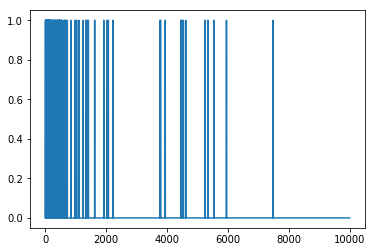

In [3]:
plt.plot(train_data[0])

In [4]:
baseline_model = keras.Sequential([
    # `input_shape` is only required here so that `.summary` works. 
    keras.layers.Dense(16, activation=tf.nn.relu, input_shape=(NUM_WORDS,)),
    keras.layers.Dense(16, activation=tf.nn.relu),
    keras.layers.Dense(1, activation=tf.nn.sigmoid)
])

baseline_model.compile(optimizer='adam',
                       loss='binary_crossentropy',
                       metrics=['accuracy', 'binary_crossentropy'])

baseline_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                160016    
_________________________________________________________________
dense_1 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 17        
Total params: 160,305
Trainable params: 160,305
Non-trainable params: 0
_________________________________________________________________


In [5]:
baseline_history = baseline_model.fit(train_data,
                                      train_labels,
                                      epochs=20,
                                      batch_size=512,
                                      validation_data=(test_data, test_labels),
                                      verbose=2)

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
 - 16s - loss: 0.5120 - acc: 0.7828 - binary_crossentropy: 0.5120 - val_loss: 0.3498 - val_acc: 0.8702 - val_binary_crossentropy: 0.3498
Epoch 2/20
 - 9s - loss: 0.2568 - acc: 0.9067 - binary_crossentropy: 0.2568 - val_loss: 0.2840 - val_acc: 0.8880 - val_binary_crossentropy: 0.2840
Epoch 3/20
 - 14s - loss: 0.1850 - acc: 0.9354 - binary_crossentropy: 0.1850 - val_loss: 0.2874 - val_acc: 0.8852 - val_binary_crossentropy: 0.2874
Epoch 4/20
 - 7s - loss: 0.1475 - acc: 0.9499 - binary_crossentropy: 0.1475 - val_loss: 0.3120 - val_acc: 0.8792 - val_binary_crossentropy: 0.3120
Epoch 5/20
 - 9s - loss: 0.1220 - acc: 0.9600 - binary_crossentropy: 0.1220 - val_loss: 0.3385 - val_acc: 0.8739 - val_binary_crossentropy: 0.3385
Epoch 6/20
 - 13s - loss: 0.1013 - acc: 0.9682 - binary_crossentropy: 0.1013 - val_loss: 0.3678 - val_acc: 0.8695 - val_binary_crossentropy: 0.3678
Epoch 7/20
 - 9s - loss: 0.0846 - acc: 0.9748 - binary_crossentro

In [6]:
smaller_model = keras.Sequential([
    keras.layers.Dense(4, activation=tf.nn.relu, input_shape=(NUM_WORDS,)),
    keras.layers.Dense(4, activation=tf.nn.relu),
    keras.layers.Dense(1, activation=tf.nn.sigmoid)
])

smaller_model.compile(optimizer='adam',
                loss='binary_crossentropy',
                metrics=['accuracy', 'binary_crossentropy'])

smaller_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 4)                 40004     
_________________________________________________________________
dense_4 (Dense)              (None, 4)                 20        
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 5         
Total params: 40,029
Trainable params: 40,029
Non-trainable params: 0
_________________________________________________________________


In [7]:
smaller_history = smaller_model.fit(train_data,
                                    train_labels,
                                    epochs=20,
                                    batch_size=512,
                                    validation_data=(test_data, test_labels),
                                    verbose=2)

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
 - 12s - loss: 0.6084 - acc: 0.6561 - binary_crossentropy: 0.6084 - val_loss: 0.5405 - val_acc: 0.7706 - val_binary_crossentropy: 0.5405
Epoch 2/20
 - 9s - loss: 0.4829 - acc: 0.8442 - binary_crossentropy: 0.4829 - val_loss: 0.4806 - val_acc: 0.8396 - val_binary_crossentropy: 0.4806
Epoch 3/20
 - 9s - loss: 0.4131 - acc: 0.9014 - binary_crossentropy: 0.4131 - val_loss: 0.4266 - val_acc: 0.8778 - val_binary_crossentropy: 0.4266
Epoch 4/20
 - 12s - loss: 0.3089 - acc: 0.9297 - binary_crossentropy: 0.3089 - val_loss: 0.3068 - val_acc: 0.8846 - val_binary_crossentropy: 0.3068
Epoch 5/20
 - 16s - loss: 0.1974 - acc: 0.9426 - binary_crossentropy: 0.1974 - val_loss: 0.2891 - val_acc: 0.8841 - val_binary_crossentropy: 0.2891
Epoch 6/20
 - 12s - loss: 0.1607 - acc: 0.9517 - binary_crossentropy: 0.1607 - val_loss: 0.2933 - val_acc: 0.8838 - val_binary_crossentropy: 0.2933
Epoch 7/20
 - 7s - loss: 0.1379 - acc: 0.9590 - binary_crossentr

In [8]:
bigger_model = keras.models.Sequential([
    keras.layers.Dense(512, activation=tf.nn.relu, input_shape=(NUM_WORDS,)),
    keras.layers.Dense(512, activation=tf.nn.relu),
    keras.layers.Dense(1, activation=tf.nn.sigmoid)
])

bigger_model.compile(optimizer='adam',
                     loss='binary_crossentropy',
                     metrics=['accuracy','binary_crossentropy'])

bigger_model.summary()

bigger_history = bigger_model.fit(train_data, train_labels,
                                  epochs=20,
                                  batch_size=512,
                                  validation_data=(test_data, test_labels),
                                  verbose=2)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 512)               5120512   
_________________________________________________________________
dense_7 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 513       
Total params: 5,383,681
Trainable params: 5,383,681
Non-trainable params: 0
_________________________________________________________________
Train on 25000 samples, validate on 25000 samples
Epoch 1/20
 - 33s - loss: 0.3492 - acc: 0.8516 - binary_crossentropy: 0.3492 - val_loss: 0.2980 - val_acc: 0.8784 - val_binary_crossentropy: 0.2980
Epoch 2/20
 - 21s - loss: 0.1476 - acc: 0.9460 - binary_crossentropy: 0.1476 - val_loss: 0.3573 - val_acc: 0.8648 - val_binary_crossentropy: 0.3573
Epoch 3/20
 - 39s - loss: 0.0579 - acc: 0.9824 - b

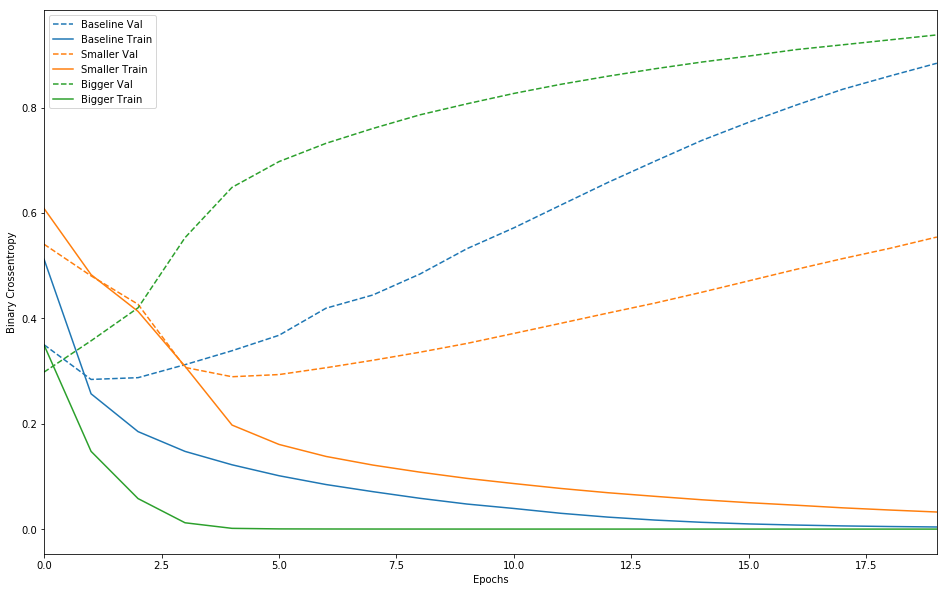

In [9]:
def plot_history(histories, key='binary_crossentropy'):
  plt.figure(figsize=(16,10))
    
  for name, history in histories:
    val = plt.plot(history.epoch, history.history['val_'+key],
                   '--', label=name.title()+' Val')
    plt.plot(history.epoch, history.history[key], color=val[0].get_color(),
             label=name.title()+' Train')

  plt.xlabel('Epochs')
  plt.ylabel(key.replace('_',' ').title())
  plt.legend()

  plt.xlim([0,max(history.epoch)])


plot_history([('baseline', baseline_history),
              ('smaller', smaller_history),
              ('bigger', bigger_history)])

In [10]:
l2_model = keras.models.Sequential([
    keras.layers.Dense(16, kernel_regularizer=keras.regularizers.l2(0.001),
                       activation=tf.nn.relu, input_shape=(NUM_WORDS,)),
    keras.layers.Dense(16, kernel_regularizer=keras.regularizers.l2(0.001),
                       activation=tf.nn.relu),
    keras.layers.Dense(1, activation=tf.nn.sigmoid)
])

l2_model.compile(optimizer='adam',
                 loss='binary_crossentropy',
                 metrics=['accuracy', 'binary_crossentropy'])

l2_model_history = l2_model.fit(train_data, train_labels,
                                epochs=20,
                                batch_size=512,
                                validation_data=(test_data, test_labels),
                                verbose=2)

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
 - 19s - loss: 0.5338 - acc: 0.7893 - binary_crossentropy: 0.4935 - val_loss: 0.3810 - val_acc: 0.8766 - val_binary_crossentropy: 0.3382
Epoch 2/20
 - 8s - loss: 0.3036 - acc: 0.9114 - binary_crossentropy: 0.2563 - val_loss: 0.3360 - val_acc: 0.8878 - val_binary_crossentropy: 0.2855
Epoch 3/20
 - 7s - loss: 0.2539 - acc: 0.9303 - binary_crossentropy: 0.2011 - val_loss: 0.3387 - val_acc: 0.8862 - val_binary_crossentropy: 0.2840
Epoch 4/20
 - 7s - loss: 0.2297 - acc: 0.9407 - binary_crossentropy: 0.1734 - val_loss: 0.3515 - val_acc: 0.8826 - val_binary_crossentropy: 0.2942
Epoch 5/20
 - 7s - loss: 0.2176 - acc: 0.9470 - binary_crossentropy: 0.1586 - val_loss: 0.3643 - val_acc: 0.8790 - val_binary_crossentropy: 0.3044
Epoch 6/20
 - 11s - loss: 0.2048 - acc: 0.9519 - binary_crossentropy: 0.1443 - val_loss: 0.3787 - val_acc: 0.8753 - val_binary_crossentropy: 0.3178
Epoch 7/20
 - 7s - loss: 0.1982 - acc: 0.9548 - binary_crossentrop

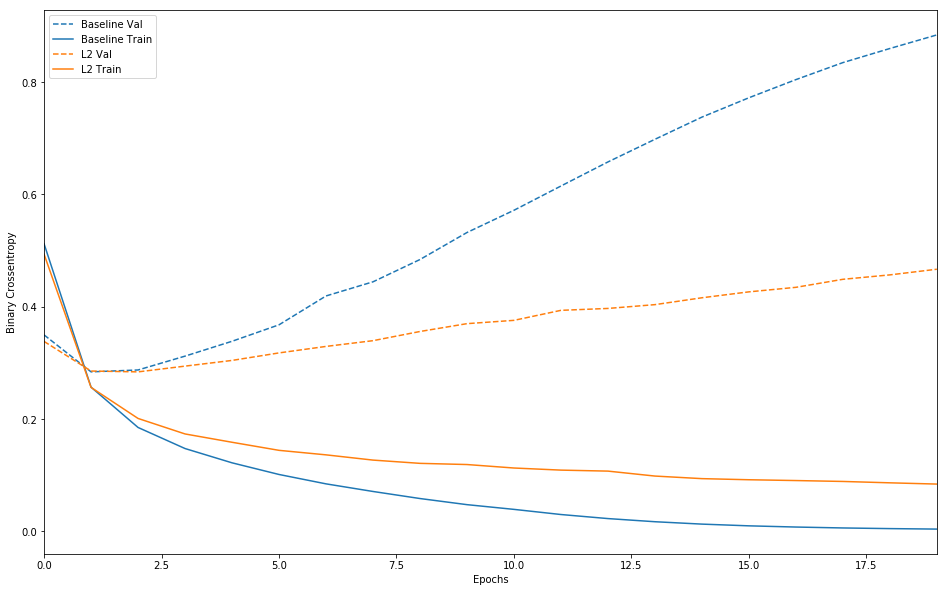

In [11]:
plot_history([('baseline', baseline_history),
              ('l2', l2_model_history)])

In [12]:
dpt_model = keras.models.Sequential([
    keras.layers.Dense(16, activation=tf.nn.relu, input_shape=(NUM_WORDS,)),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(16, activation=tf.nn.relu),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(1, activation=tf.nn.sigmoid)
])

dpt_model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy','binary_crossentropy'])

dpt_model_history = dpt_model.fit(train_data, train_labels,
                                  epochs=20,
                                  batch_size=512,
                                  validation_data=(test_data, test_labels),
                                  verbose=2)

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
 - 7s - loss: 0.6189 - acc: 0.6461 - binary_crossentropy: 0.6189 - val_loss: 0.4521 - val_acc: 0.8550 - val_binary_crossentropy: 0.4521
Epoch 2/20
 - 4s - loss: 0.4353 - acc: 0.8147 - binary_crossentropy: 0.4353 - val_loss: 0.3268 - val_acc: 0.8827 - val_binary_crossentropy: 0.3268
Epoch 3/20
 - 5s - loss: 0.3362 - acc: 0.8724 - binary_crossentropy: 0.3362 - val_loss: 0.2835 - val_acc: 0.8860 - val_binary_crossentropy: 0.2835
Epoch 4/20
 - 7s - loss: 0.2837 - acc: 0.8954 - binary_crossentropy: 0.2837 - val_loss: 0.2737 - val_acc: 0.8878 - val_binary_crossentropy: 0.2737
Epoch 5/20
 - 5s - loss: 0.2391 - acc: 0.9166 - binary_crossentropy: 0.2391 - val_loss: 0.2779 - val_acc: 0.8868 - val_binary_crossentropy: 0.2779
Epoch 6/20
 - 5s - loss: 0.2094 - acc: 0.9266 - binary_crossentropy: 0.2094 - val_loss: 0.2865 - val_acc: 0.8860 - val_binary_crossentropy: 0.2865
Epoch 7/20
 - 5s - loss: 0.1842 - acc: 0.9346 - binary_crossentropy:

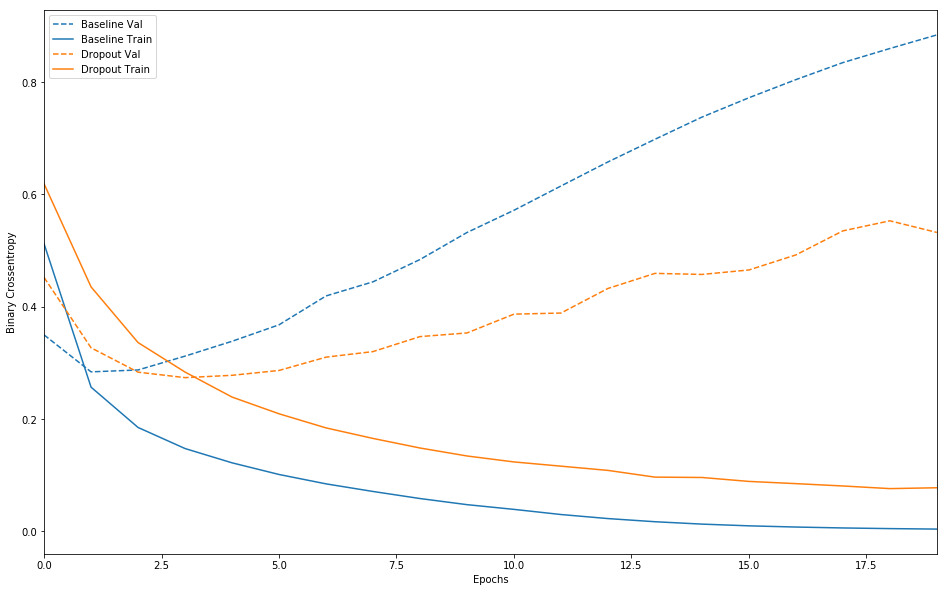

In [13]:
plot_history([('baseline', baseline_history),
              ('dropout', dpt_model_history)])